# Intro to Sickit-Learn (sklearn)
Most useful functions

What are we covering:
    
0. End to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithn for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve the model
6. Save and load a trained model
7. Put it all together

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. End to end scikit learn workflow

In [2]:
#1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (features matrix)
X=heart_disease.drop("target", axis=1)

# create y (labels)
y=heart_disease["target"]

In [4]:
import warnings
warnings.filterwarnings("default")   # or ("ignore"). Sometimes you may want to update versions of packages (in Conda) 
                                     # that generate the warnings

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We will keep the deafult hyperparameters
clf.get_params()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3. Fit the model to the training data (finding patterns)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3


In [9]:
# make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2


In [11]:
y_preds=clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [12]:
y_test

28     1
201    0
128    1
116    1
259    0
      ..
265    0
9      1
207    0
177    0
64     1
Name: target, Length: 61, dtype: int64

In [13]:
#4. Evaluate the model on training and test data
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        29
           1       0.76      0.91      0.83        32

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[20,  9],
       [ 3, 29]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [18]:
#5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 83.61%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 85.25%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [19]:
#6. Save model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

<ipython-input-19-a23441d57170>:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl","wb"))


In [20]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

<ipython-input-20-24341ecedbbf>:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))


0.8360655737704918

## 1. Getting our data ready to be ready to be used with machine learning

Three main things to do
1. Split the data into features and labels (usually X and y)
2. Filling (also called inputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [25]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
X.shape[0]*0.8

242.4

In [27]:
len(heart_disease)

303

## Make sure all is numerical

In [28]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# Split the data into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [33]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")
transformed_X =transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
model.score(X_test, y_test)

0.3235867221569877

In [39]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


# 1.2 What if there were missing values?

1. Fill with a value (or imputation)
2. Remove samples with missing data

In [40]:
# Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [43]:
# Lets try to convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")
transformed_X =transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [44]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [45]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [46]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing)

950

In [50]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# Lets try to convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")
transformed_X =transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: fill missing values with scikit learn

Note: This section is different to the video. The video shows filling and transforming the entire dataset (X) and although the 
    techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

The main takeaways:

Split your data first (into train/test)

Fill/transform the training set and test sets separately

In [52]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [56]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [57]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns
# in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill 
# the test set (transform only).

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [58]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [60]:

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [61]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [62]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

In [63]:
# Note: The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

## 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another

* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [64]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [65]:
# shows as dictionary, and we want to see it clearly as a pandas dataframe

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
# How many samples?
len(boston_df)

506

In [67]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168519

### How do we improve this score?

What if Ridge wasn't working?

Refer back to the scikit-learn ml map

In [68]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [69]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168519

### 2.2 Choosing and estimator for a classification problem

Lets go to the map...

Now, let's check out the choosing process for a classification problem.

Say you were trying to predict whether or not a patient had heart disease based on their medical records.

The dataset in ../data/heart-disease.csv contains data for just that problem.

In [70]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
# How many samples are there?
len(heart_disease)

303

### Similar to the Boston housing dataset, here we want to use all of the available data to predict the target column (1 for if a patient has heart disease and 0 for if they don't).

So what do we know?

We've got 303 samples (1 row = 1 sample) and we're trying to predict whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Following the cheat-sheet we end up at LinearSVC which stands for Linear Support Vector Classifier. Let's try it on our data.

In [72]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

In [73]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

### Straight out of the box (with no tuning or improvements) the model scores 47% accuracy, which with 2 classes (heart disease or not) is as good as guessing.

With this result, we'll go back to our diagram and see what our options are.

Following the path (and skipping a few, don't worry, we'll get to this) we come up to EnsembleMethods again. Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our RandomForestRegressor from above? We'll it has a dance partner, RandomForestClassifier which is an ensemble based machine model learning model for classification. You might be able to guess what we can use it for.

Let's try.

In [74]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

# A little tidbit for modelling in machine learning is:

If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.

If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

# 3. Fit the model to data and using it to make predictions
Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

If you've followed through, you've seen a few examples of this already.

## 3.1 Fitting a model to data
In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the fit() method and passing it data, such as, fit(X, y).

Where X is a feature array and y is a target array.

Other names for X include: data, feature variables, features

Other names for y include: labels, target variable, targets

For supervised learning there is usually an X and y. For unsupervised learning, there's no y (no labels).

Let's revisit the example of using patient data (X) to predict whether or not they have heart disease (y).

In [75]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data (training ML model)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set) - (Evaluation use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### What's happening here?

Calling the fit() method will cause the machine learning algorithm to attempt to find patterns between X and y. Or if there's no y, it'll only find the patterns within X.

Let's see X.

In [76]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Making predictions using a machine learning model
Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. 

Two of the most common and useful are predict() and predict_proba().

Let's see them in action.

In [78]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Given data in the form of X, the predict() function returns labels in the form of y.

It's standard practice to save these predictions to a variable named something like y_preds for later comparison to y_test or y_true (usually same as y_test just another name).

In [80]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [82]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

### Loss = labels - predictions

In [83]:
# Return labels
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [84]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [85]:
# Find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])

array([[0.89, 0.11]])

In [86]:
# Return the label for 1 sample
clf.predict(X_test[:1])

array([0], dtype=int64)

### Where does 0.5 come from?

Because our problem is a binary classification task (heart disease or not heart disease), predicting a label with 0.5 probability every time would be the same as a coin toss (guessing). Therefore, once the prediction probability of a sample passes 0.5, for a certain label, it's assigned that label.

predict() can also be used for regression models.

In [87]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [88]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [89]:
y_preds[:10]  # PREDICTIONS

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [90]:
np.array(y_test[:10])   # ACTUAL LABELS

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [91]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

##### Now we've seen how to get a model how to find patterns in data using the fit() function and make predictions using what its learned using the predict() and predict_proba() functions, it's time to evaluate those predictions.

## 4. Evaluating ML model

### Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.

The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.

Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

## 4.1 General model evaluation with score()
If we bring down the code from our previous classification problem (building a classifier to predict whether or not someone has heart disease based on their medical records).

We can see the score() method come into play.

In [92]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [93]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [94]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [95]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating your models using the scoring parameter
The next step up from using score() is to use a custom scoring parameter with cross_val_score() or GridSearchCV.

As you may have guessed, the scoring parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment but first let's check out cross_val_score().

To do so, we'll copy the heart disease classification code from above and then add another line at the top.

In [96]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [97]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [98]:
# Using cross_val_score()
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [99]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [100]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [101]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come across for classification models are:

Accuracy

Area under ROC curve

Confusion matrix

Classification report

In [102]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

### Accuracy
Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [103]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


### Area under curve (AUC) or ROC (receiver operating characteristic) curve

True positive = model predicts 1 when truth is 1

False positive = model predicts 1 when truth is 0

True negative = model predicts 0 when truth is 0

False negative = model predicts 0 when truth is 1

In [104]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

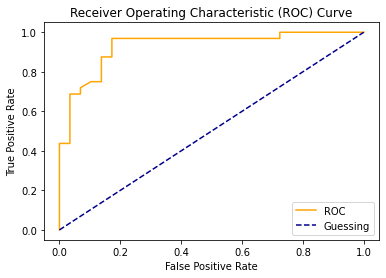

In [105]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [106]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.9304956896551724

In [107]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

### In reality, a perfect ROC curve is unlikely.

### Confusion matrix

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [108]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [109]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


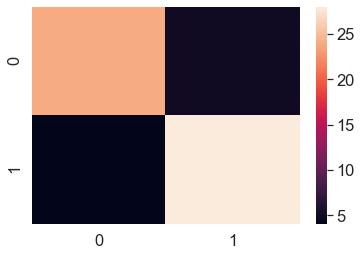

In [110]:
# Plot a confusion matrix with Seaborn
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

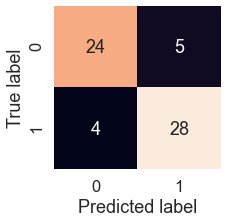

In [111]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

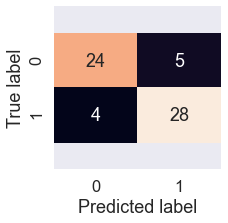

In [112]:
## This option is trying to fix text in wrong locations caused by previous matplotlib previous versions, but is no longer needed

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(conf_mat)

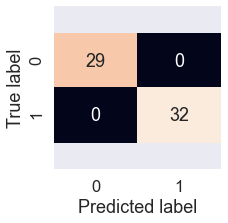

In [113]:
# Create perfect confusion matrix
perfect_conf_mat = confusion_matrix(y_test, y_test)
plot_conf_mat(perfect_conf_mat)

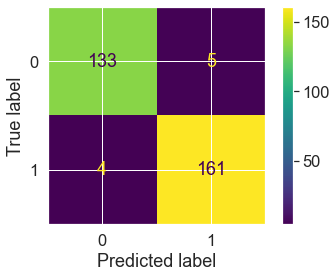

In [114]:
# Returns an error.... (at time of writing)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

### Classification report
The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's classification_report() function.

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [116]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize:

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)

Precision and recall become more important when classes are imbalanced.

If false positive predictions are worse than false negatives, aim for higher precision.

If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Regression model evaluation metrics
Similar to classification, there are several metrics you can use to evaluate your regression models.We'll check out the following three metrics:

R^2 (pronounced r-squared) or coefficient of determination - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

### R^2

In [117]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [118]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8654448653350507

In [119]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [120]:
r2_score(y_test, y_test)

1.0

### Mean absolute error

In [121]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [122]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predicted values": y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


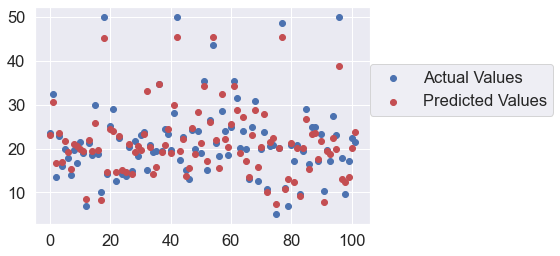

In [123]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Actual Values")
ax.scatter(x, df["predicted values"], c='r', label="Predicted Values")
ax.legend(loc=(1, 0.5));

###  Mean squared error

In [124]:
#  Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

### Maximize R^2 error
### Minimize MAE
### Minimize MSE

### 4.2.3 Finally using the scoring parameter
Woah. We've covered a bunch but haven't even touched the scoring parameter...

As a refresh, the scoring parameter can be used with a function like cross_val_score() to tell Scikit-Learn what evaluation metric to return using cross-validation.

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [126]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [127]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [128]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [129]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [130]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [131]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [133]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.62


In [134]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -3.03


In [135]:
np.random.seed(42)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -21.26


## 4.3 Using different evaluation metrics with Scikit-Learn
Remember the third way of evaluating Scikit-Learn functions?

Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called y_preds to an array of actual labels, usually called y_test or y_true.

Classification functions
For:

Accuracy we can use accuracy_score()

Precision we can use precision_score()

Recall we can use recall_score()

F1 we can use f1_score()

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [137]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.87
MAE: 2.14
MSE: 9.87


In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.87
MAE: 2.14
MSE: 9.87


## 5. Improving model predictions through experimentation (hyperparameter tuning)

The first predictions you make with a model are generally referred to as baseline predictions. 

The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics (same as improving your model).

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:

Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:

Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)

Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

# Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have `model_1` and `model_2` which each differ slightly.

If you want to compare and evaluate their results, `model_1` and `model_2` should both be trained on the same data (e.g. `X_train` and `y_train`) and their predictions should each be made on the same data, for example:
* `model_1.fit(X_train, y_train)` -> `model_1.predict(X_test)` -> `model_1_preds`
* `model_2.fit(X_train, y_train)` -> `model_2.predict(X_test)` -> `model_2_preds`

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

This short notebook compares 3 different models on a small dataset.
1. A baseline `RandomForestClassifier` (all default parameters)
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (and `refit=True`)
3. A `RandomForestClassifier` tuned with `GridSearchCV` (and `refit=True`)

The most important part is they all use the same data splits created using `train_test_split()` and `np.random.seed(42)`.

In [183]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Import and Split Data

In [185]:
heart_disease = pd.read_csv("data/heart-disease.csv")

# Split into X & y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [140]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand
So far we've worked with training and test datasets.

You train a model on a training set and evaluate it on a test dataset.

But hyperparameter tuning introduces a third set, a validation set:

training, validation and test sets!

### According to literature, we are going to adjust from std values:

 'max_depth': None,
 
 'max_features': 'auto',
 
 'min_samples_leaf': 1,
 
 'min_samples_split': 2,
 
 'n_estimators': 100,
 
 See following an EVALUATION FUNCTION to help on this process:

## Make evaluation function

Our evaluation function will use all of the major classification metric functions from Scikit-Learn.

In [142]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

## Baseline Model

Create model with default hyperparameters. See RandomForestClassifier documentation for more info.

In [188]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV
Scikit-Learn's RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best. 

It also stores details about the ones which work best!

Find hyperparameters with RandomizedSearchCV.

Note: Although best parameters are found on different splits of X_train and y_train, because refit=True, once the best parameters are found, they are refit to the entire set of X_train and y_train. See the RandomizedSearchCV and cross-validation documentation for more.

In [190]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.7s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [191]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [192]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


## 5.3 Hyperparameter tuning with GridSearchCV

The main difference between GridSearchCV and RandomizedSearchCV is GridSearchCV searches across a grid of hyperparamters exhaustively, where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).

Find best hyperparameters using GridSearchCV.

Note: Although best parameters are found on different splits of X_train and y_train, because refit=True, once the best parameters are found, they are refit to the entire set of X_train and y_train. See the GridSearchCV and cross-validation documentation for more.

In [193]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [194]:
6*5*2*3*3*5   ## possible combinations to train and test. Consider if it requires a lot of computer power...

2700

In [195]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1,

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto,

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=sq

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   27.1s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [196]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [197]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


### Lets compare our different models metrics

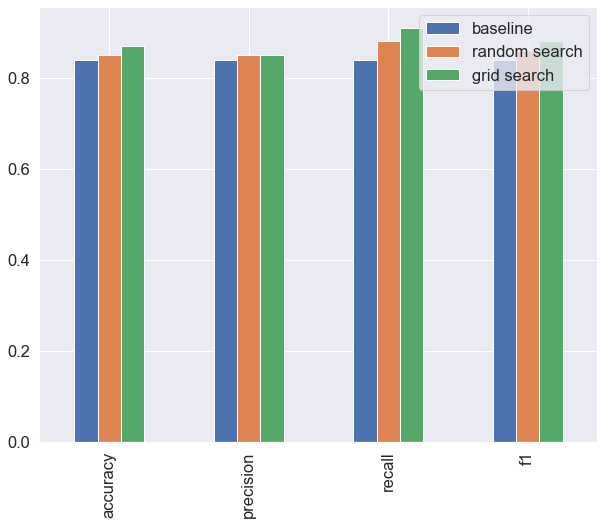

In [199]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models
Two ways to save and load machine learning models:

With Python's pickle module

With the joblib module

### Pickle

In [225]:
tracemalloc.start(1)

In [226]:
import pickle
# import tracemalloc

# Save an extisting model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

# tracemalloc.get_tracemalloc_memory()

<ipython-input-226-9add60d11c4b>:5: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pkl'>
  pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))
Object allocated at (most recent call last):
  File "<ipython-input-226-9add60d11c4b>", lineno 5
    pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))


In [219]:
tracemalloc.is_tracing()

False

In [220]:
tracemalloc.clear_traces()

In [221]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

<ipython-input-221-0426e5df1ebe>:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model_1.pkl'>
  loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))


In [218]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

### Joblib

In [227]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [228]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [229]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

## 7. Putting it all together!